In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('insurance.xlsx')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
print(df.sex.unique())
print(df.smoker.unique())
print(df.region.unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [4]:
sex = []
for i in range(len(df)):
    if(df['sex'][i] == 'male'):
        sex.append(0)
    else:
        sex.append(1)

In [5]:
smoker = []
for i in range(len(df)):
    if(df['smoker'][i] == 'yes'):
        smoker.append(1)
    else:
        smoker.append(0)

In [6]:
region = []
for i in range(len(df)):
    if(df['region'][i] == 'southwest'):
        region.append(0)
    elif(df['region'][i] == 'southeast'):
        region.append(1)
    elif(df['region'][i] == 'northwest'):
        region.append(2)
    else:
        region.append(3)

In [7]:
df['sex'] = sex
df['smoker'] = smoker
df['region'] = region
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,0,2007.94500


In [8]:
X = df.drop('charges', axis = 1)
y = df['charges']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(936, 6)
(936,)
(402, 6)
(402,)


# Apply Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
# print(y_pred)

In [12]:
details = {
    'y_test' : list(y_test),
    'y_pred' : list(y_pred),
}
temp = pd.DataFrame(details)
temp

,y_test,y_pred
0,1826.84300,4137.795178
1,20177.67113,4346.994621
2,7421.19455,8607.174287
3,1877.92940,2995.801113
4,15518.18025,25642.535475
...,...,...
397,1727.54000,4041.443010
398,4433.38770,6846.468160
399,4618.07990,5570.078644
400,4320.41085,8407.775456


# Finding Error between Actual Charges and Predicted Charges

In [1]:
algorithm = []
mae = []
mse = []
rmse = []

algorithm.append('Linear Regression')

from sklearn import metrics
print('Mean Absolute Error = ', metrics.mean_absolute_error(y_test, y_pred))
mae.append(metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error = ', metrics.mean_squared_error(y_test, y_pred))
mse.append(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

NameError: name 'y_test' is not defined

# Plotting Scatter Plot

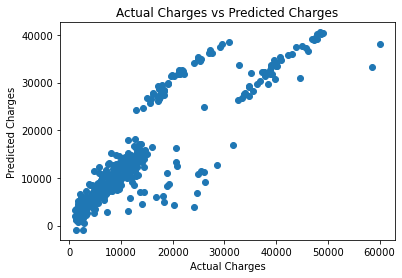

In [14]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual Charges vs Predicted Charges")
plt.show()

# Histogram

<AxesSubplot:xlabel='charges', ylabel='Count'>

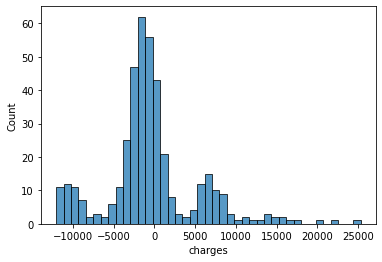

In [15]:
import seaborn as sns
sns.histplot(y_test - y_pred)

# Apply XGBoost Regressor

In [16]:
# Run 'pip install xgboost' command on Anaconda Prompt 
# OR run '!pip install xgboost' in Jupyter Notebook cell
!pip install xgboost

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [17]:
#import xgboost
from xgboost import XGBRegressor
xgboostRegressor = XGBRegressor()
xgboostRegressor.fit(X_train, y_train)
y_pred = xgboostRegressor.predict(X_test)
# print(y_pred)

In [18]:
algorithm.append('XGBoost Regressor')
print('Mean Absolute Error = ', metrics.mean_absolute_error(y_test, y_pred))
mae.append(metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error = ', metrics.mean_squared_error(y_test, y_pred))
mse.append(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error =  3070.889558910127
Mean Squared Error =  23946186.45366756
Root Mean Squared Error =  4893.48408127252


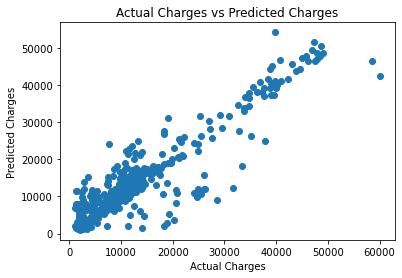

In [19]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual Charges vs Predicted Charges")
plt.show()

<AxesSubplot:xlabel='charges', ylabel='Count'>

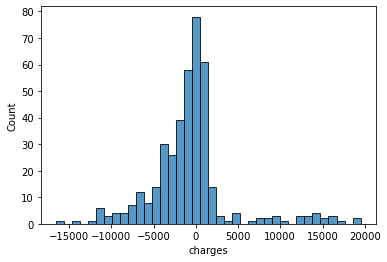

In [20]:
import seaborn as sns
sns.histplot(y_test - y_pred)

# Applying Random Forest Regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor
randomForestRegressor = RandomForestRegressor()
# randomForestRegressor = RandomForestRegressor(random_state = 50)
randomForestRegressor.fit(X_train, y_train)
y_pred = randomForestRegressor.predict(X_test)
# print(y_pred)

In [22]:
algorithm.append('Random Forest Regressor')
print('Mean Absolute Error = ', metrics.mean_absolute_error(y_test, y_pred))
mae.append(metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error = ', metrics.mean_squared_error(y_test, y_pred))
mse.append(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error =  2888.67667962873
Mean Squared Error =  21910168.095485993
Root Mean Squared Error =  4680.829851157377


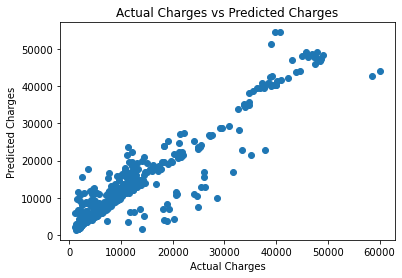

In [23]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual Charges vs Predicted Charges")
plt.show()

<AxesSubplot:xlabel='charges', ylabel='Count'>

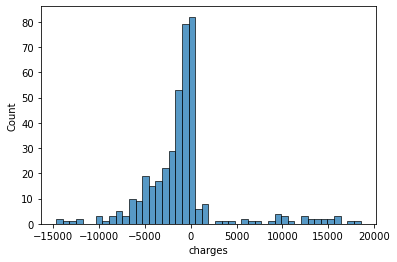

In [24]:
import seaborn as sns
sns.histplot(y_test - y_pred)

# Support Vector Regressor (SVR)
## SVR kernel : {'linear', 'poly', 'rbf', 'sigmoid', etc.}
Default kernel = 'rbf'

In [25]:
from sklearn.svm import SVR
supportVectorRegressor = SVR(kernel = 'rbf')
supportVectorRegressor.fit(X_train, y_train)
y_pred = supportVectorRegressor.predict(X_test)
# print(y_pred)

In [26]:
algorithm.append('SVR - rbf kernel')
print('Mean Absolute Error = ', metrics.mean_absolute_error(y_test, y_pred))
mae.append(metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error = ', metrics.mean_squared_error(y_test, y_pred))
mse.append(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error =  8305.249728354036
Mean Squared Error =  163166386.0549302
Root Mean Squared Error =  12773.659853578778


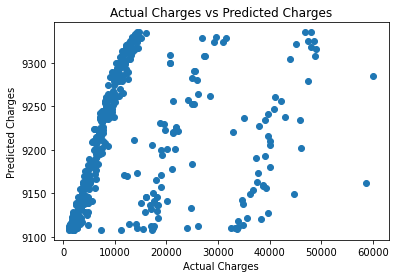

In [27]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual Charges vs Predicted Charges")
plt.show()

<AxesSubplot:xlabel='charges', ylabel='Count'>

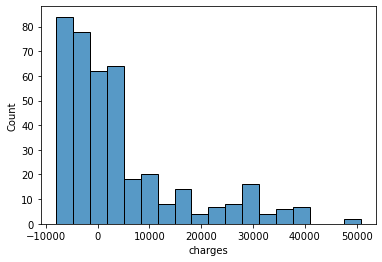

In [28]:
import seaborn as sns
sns.histplot(y_test - y_pred)

In [29]:
from sklearn.svm import SVR
supportVectorRegressor = SVR(kernel = 'sigmoid')
supportVectorRegressor.fit(X_train, y_train)
y_pred = supportVectorRegressor.predict(X_test)
# print(y_pred)

In [30]:
algorithm.append('SVR - sigmoid kernel')
print('Mean Absolute Error = ', metrics.mean_absolute_error(y_test, y_pred))
mae.append(metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error = ', metrics.mean_squared_error(y_test, y_pred))
mse.append(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error =  8344.247782714552
Mean Squared Error =  163439973.45956156
Root Mean Squared Error =  12784.364413593723


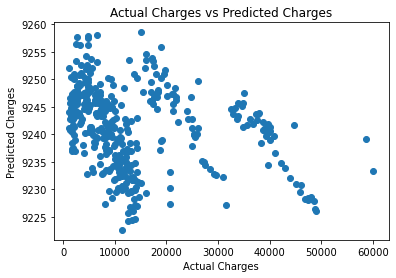

In [31]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual Charges vs Predicted Charges")
plt.show()

<AxesSubplot:xlabel='charges', ylabel='Count'>

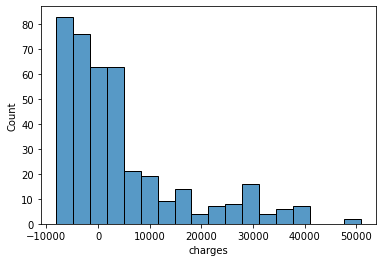

In [32]:
import seaborn as sns
sns.histplot(y_test - y_pred)

In [33]:
from sklearn.svm import SVR
supportVectorRegressor = SVR(kernel = 'linear')
supportVectorRegressor.fit(X_train, y_train)
y_pred = supportVectorRegressor.predict(X_test)
# print(y_pred)

In [34]:
algorithm.append('SVR - linear kernel')
print('Mean Absolute Error = ', metrics.mean_absolute_error(y_test, y_pred))
mae.append(metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error = ', metrics.mean_squared_error(y_test, y_pred))
mse.append(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error =  6721.12604966762
Mean Squared Error =  170193369.52381343
Root Mean Squared Error =  13045.81808564773


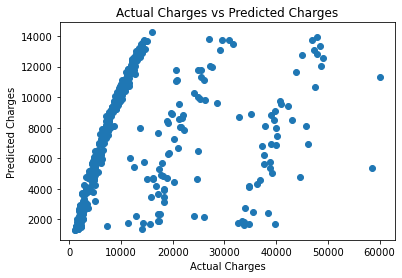

In [35]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual Charges vs Predicted Charges")
plt.show()

<AxesSubplot:xlabel='charges', ylabel='Count'>

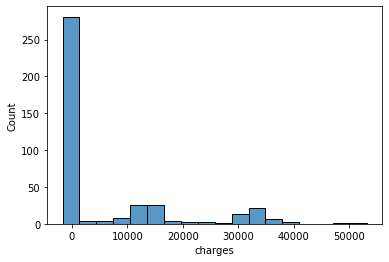

In [36]:
import seaborn as sns
sns.histplot(y_test - y_pred)

In [37]:
from sklearn.svm import SVR
supportVectorRegressor = SVR(kernel = 'poly')
supportVectorRegressor.fit(X_train, y_train)
y_pred = supportVectorRegressor.predict(X_test)
# print(y_pred)

In [38]:
algorithm.append('SVR - poly kernel')
print('Mean Absolute Error = ', metrics.mean_absolute_error(y_test, y_pred))
mae.append(metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error = ', metrics.mean_squared_error(y_test, y_pred))
mse.append(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error =  7920.996421154491
Mean Squared Error =  163046464.7949463
Root Mean Squared Error =  12768.964906951005


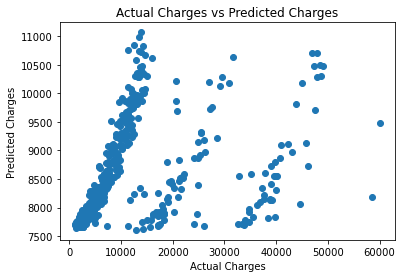

In [39]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual Charges vs Predicted Charges")
plt.show()

<AxesSubplot:xlabel='charges', ylabel='Count'>

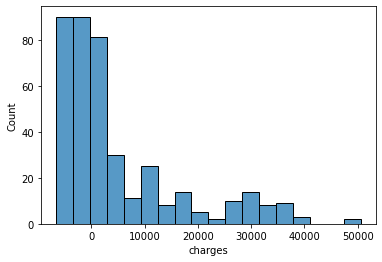

In [40]:
import seaborn as sns
sns.histplot(y_test - y_pred)

# Applying Multi-Layer Perceptron (MLP) Regressor

In [41]:
from sklearn.neural_network import MLPRegressor
MLPRegressor = MLPRegressor(random_state = 1, max_iter = 10000).fit(X_train, y_train)
y_pred = MLPRegressor.predict(X_test)
# print(y_pred)

In [42]:
algorithm.append('MLP Regressor')
print('Mean Absolute Error = ', metrics.mean_absolute_error(y_test, y_pred))
mae.append(metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error = ', metrics.mean_squared_error(y_test, y_pred))
mse.append(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error =  3959.479614721579
Mean Squared Error =  33296263.32990445
Root Mean Squared Error =  5770.2914423713855


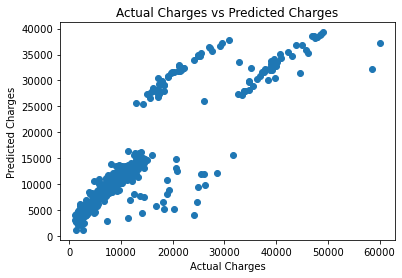

In [43]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual Charges vs Predicted Charges")
plt.show()

<AxesSubplot:xlabel='charges', ylabel='Count'>

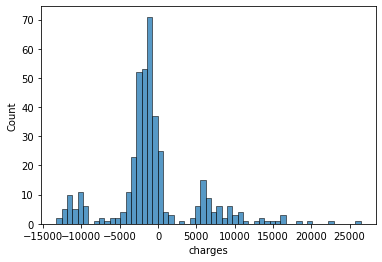

In [44]:
import seaborn as sns
sns.histplot(y_test - y_pred)

# Plot indicating error in using different regression algorithms

In [45]:
dataframe_content = {'Regression Algorithm' : algorithm, 'MAE' : mae, 'MSE' : mse, 'RMSE' : rmse}
error_data = pd.DataFrame(data = dataframe_content)
error_data

,Regression Algorithm,MAE,MSE,RMSE
0,Linear Regression,3935.564251,3.219123e+07,5673.731609
1,XGBoost Regressor,3070.889559,2.394619e+07,4893.484081
2,Random Forest Regressor,2888.676680,2.191017e+07,4680.829851
3,SVR - rbf kernel,8305.249728,1.631664e+08,12773.659854
4,SVR - sigmoid kernel,8344.247783,1.634400e+08,12784.364414
5,SVR - linear kernel,6721.126050,1.701934e+08,13045.818086
6,SVR - poly kernel,7920.996421,1.630465e+08,12768.964907
7,MLP Regressor,3959.479615,3.329626e+07,5770.291442


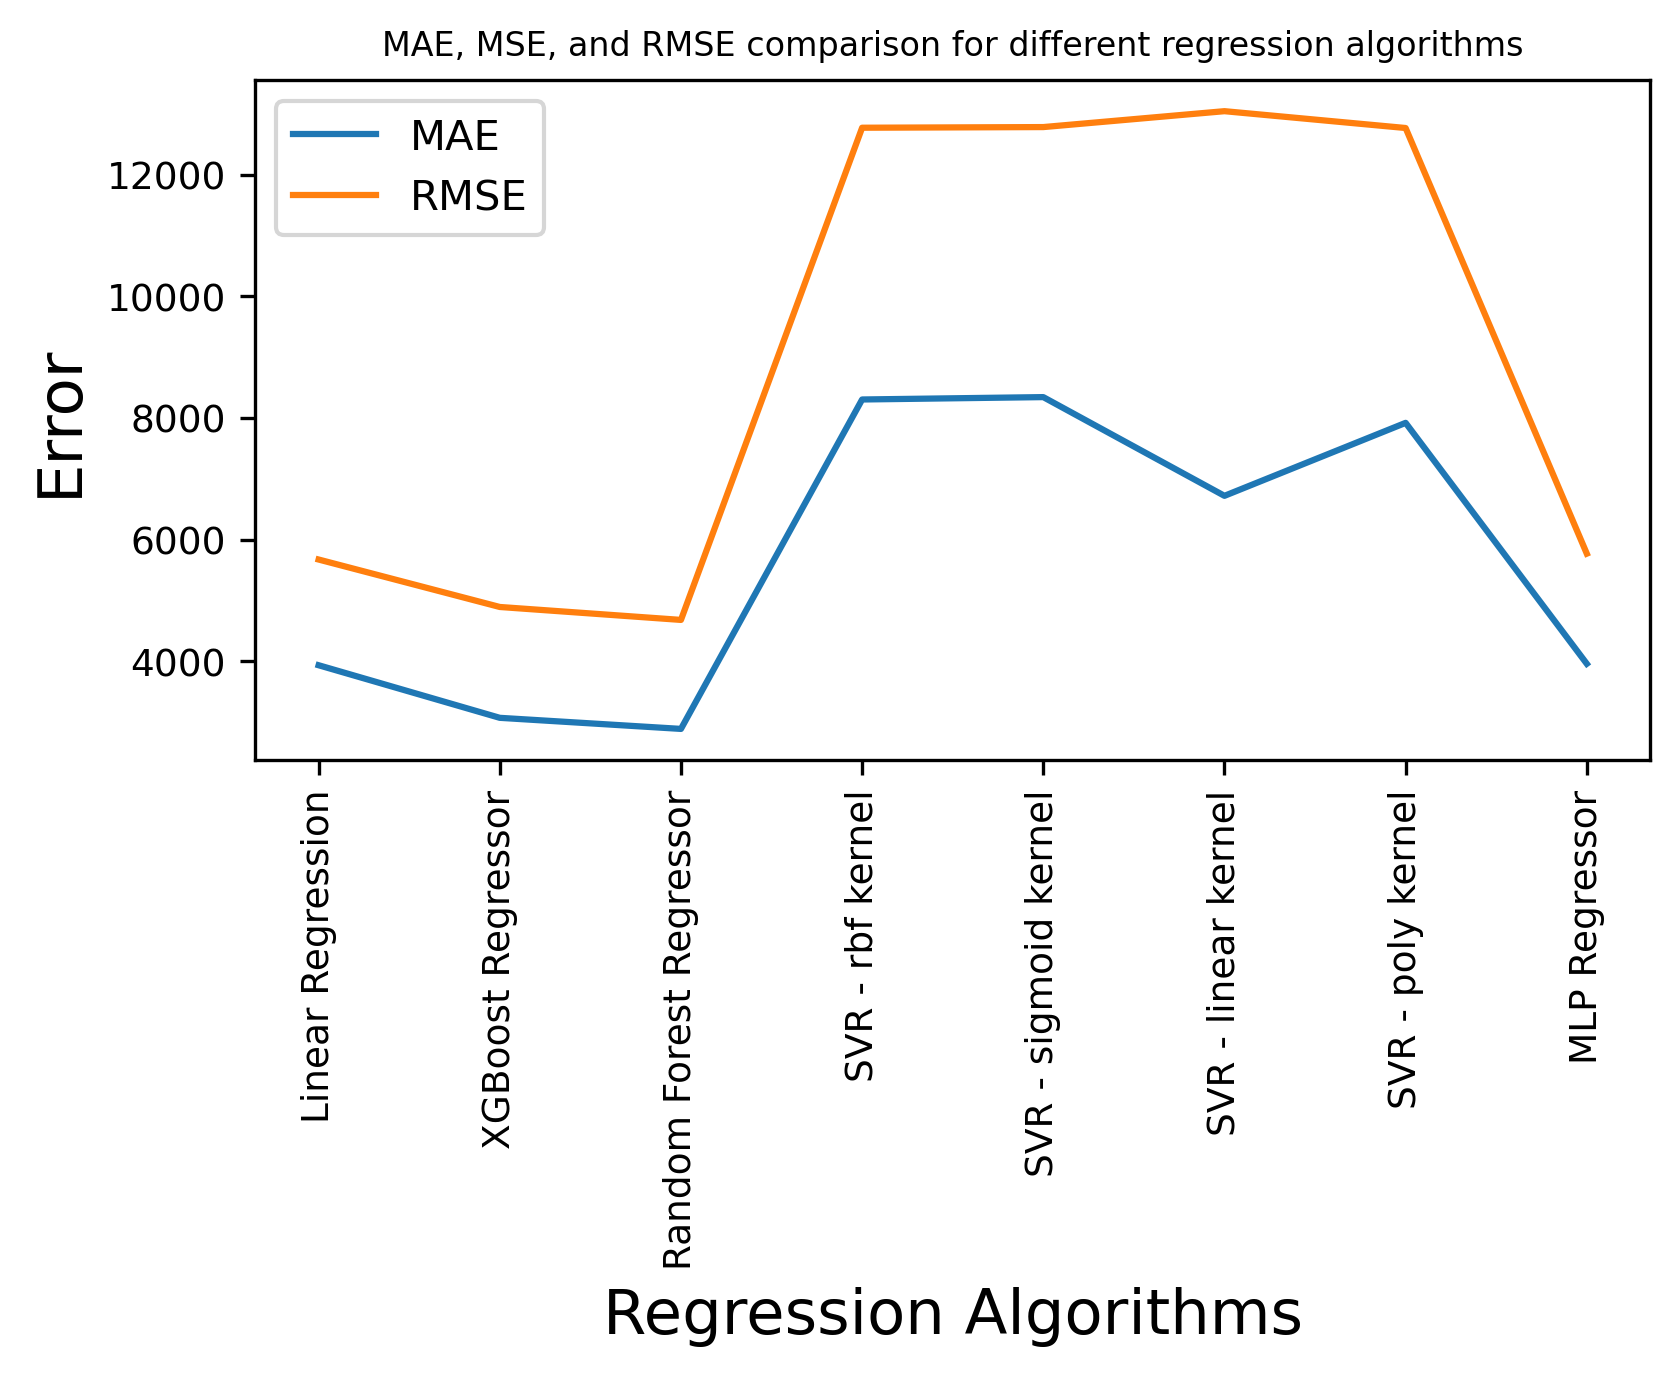

In [46]:
plt.figure(figsize = (6,3), dpi = 300)
plt.plot(algorithm, mae, label = 'MAE')
# plt.plot(algorithm, mse, label = 'MSE')
plt.plot(algorithm, rmse, label = 'RMSE')
plt.title('MAE, MSE, and RMSE comparison for different regression algorithms', fontsize = 8)
plt.xlabel('Regression Algorithms', fontsize = 15)
plt.ylabel('Error', fontsize = 15)
plt.xticks(fontsize = 9, rotation = 90)
plt.yticks(fontsize = 9)
plt.legend()
plt.show()

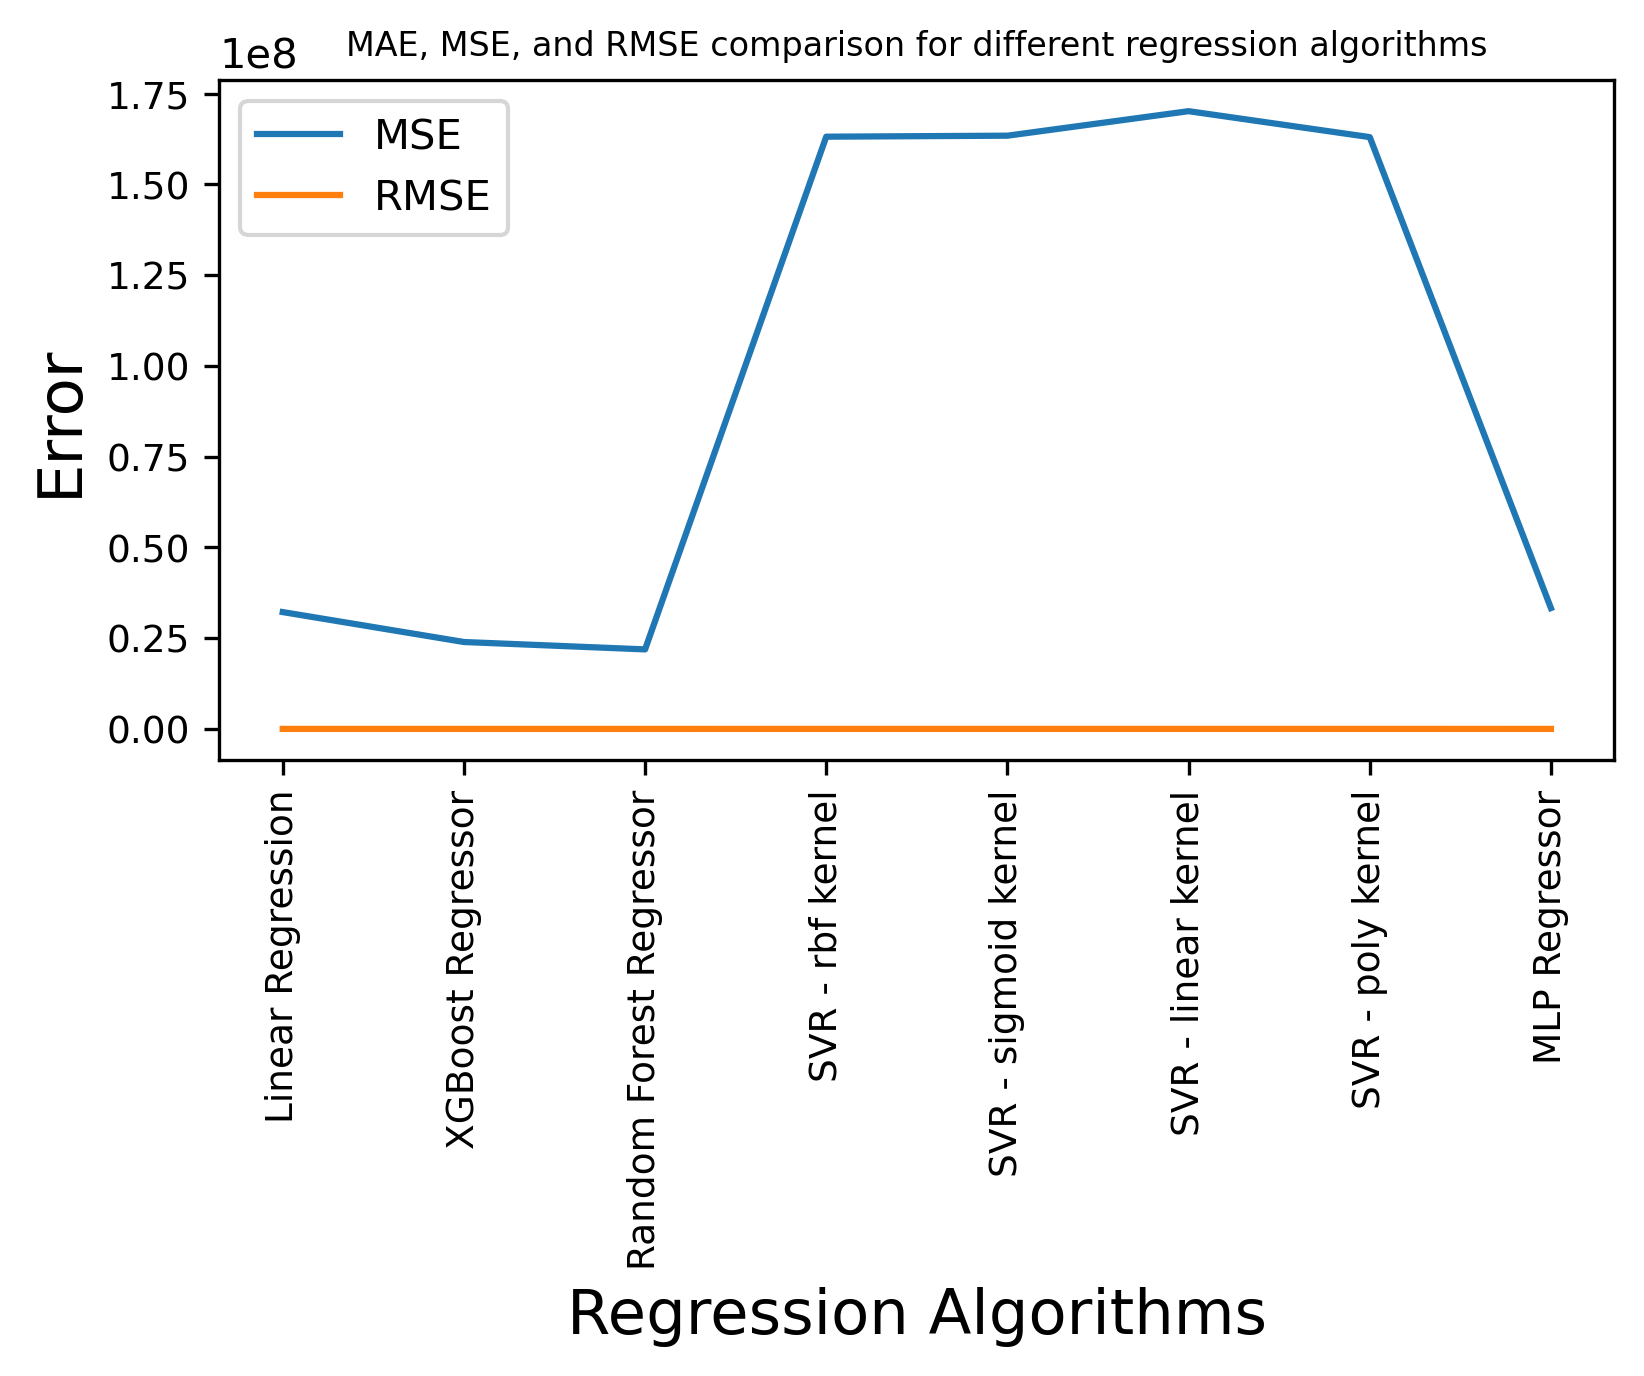

In [47]:
plt.figure(figsize = (6,3), dpi = 300)
plt.plot(algorithm, mse, label = 'MSE')
plt.plot(algorithm, rmse, label = 'RMSE')
plt.title('MAE, MSE, and RMSE comparison for different regression algorithms', fontsize = 8)
plt.xlabel('Regression Algorithms', fontsize = 15)
plt.ylabel('Error', fontsize = 15)
plt.xticks(fontsize = 9, rotation = 90)
plt.yticks(fontsize = 9)
plt.legend()
plt.show()

# Saving and Loading directly for getting fast results

In [50]:
import pickle
# Save Dataframe
with open('insurance_dataframe', 'wb') as f:
    pickle.dump(df, f)

with open('randomForestRegressor', 'wb') as f:
    pickle.dump(randomForestRegressor, f)

In [51]:
with open('insurance_dataframe', 'rb') as f:
    df = pickle.load(f)
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,0,2007.94500


In [52]:
with open('randomForestRegressor', 'rb') as f:
    randomForestRegressor = pickle.load(f)
randomForestRegressor

RandomForestRegressor()

# Final Prediction

In [53]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,0,2007.94500


In [54]:
original_df = pd.read_excel('insurance.xlsx')
original_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [55]:
import warnings
warnings.filterwarnings('ignore')
predicted_charges = randomForestRegressor.predict([[19, 1, 27.900, 0, 1, 0]])
predicted_charges

array([17072.5266068])